Dataset link : https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Steel_industry_data.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
# Convert 'date' to datetime type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [ ]:
df.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


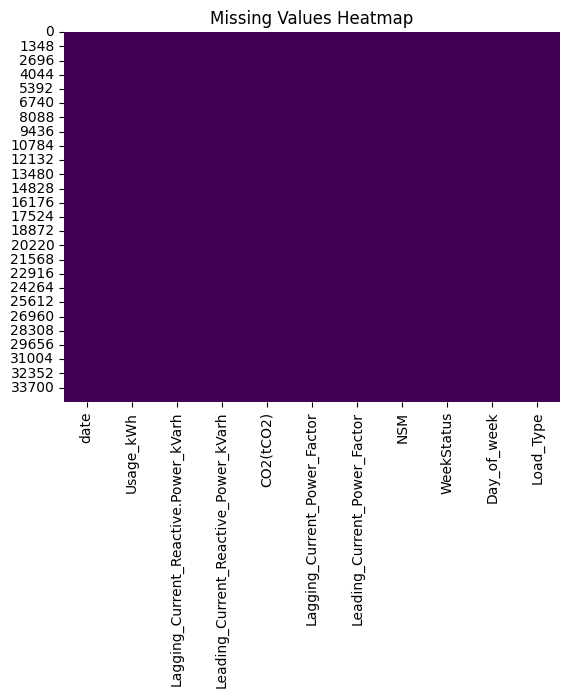

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

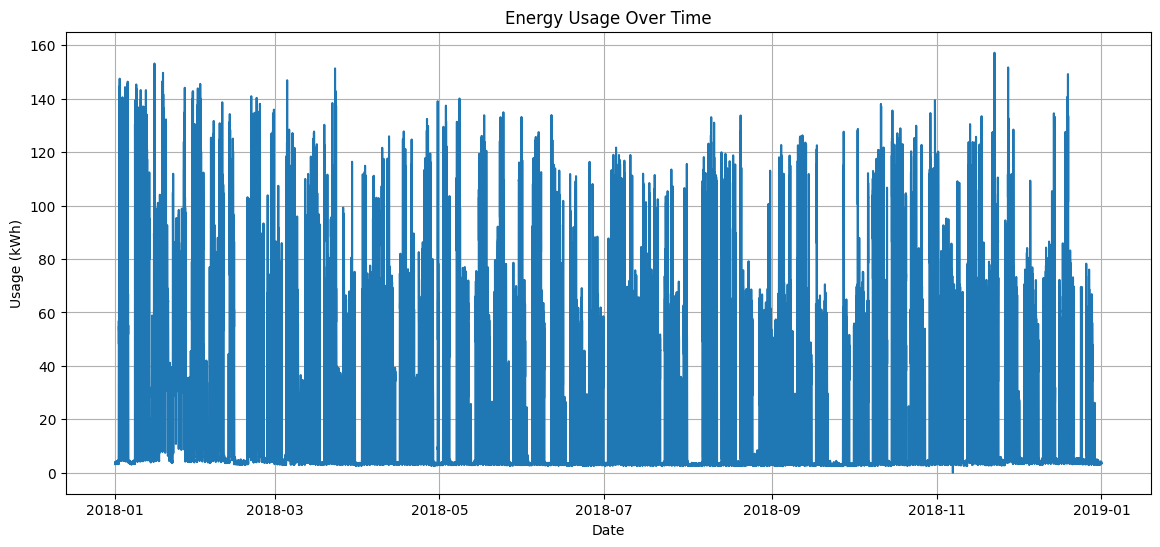

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='Usage_kWh')
plt.title("Energy Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Usage (kWh)")
plt.grid(True)
plt.show()

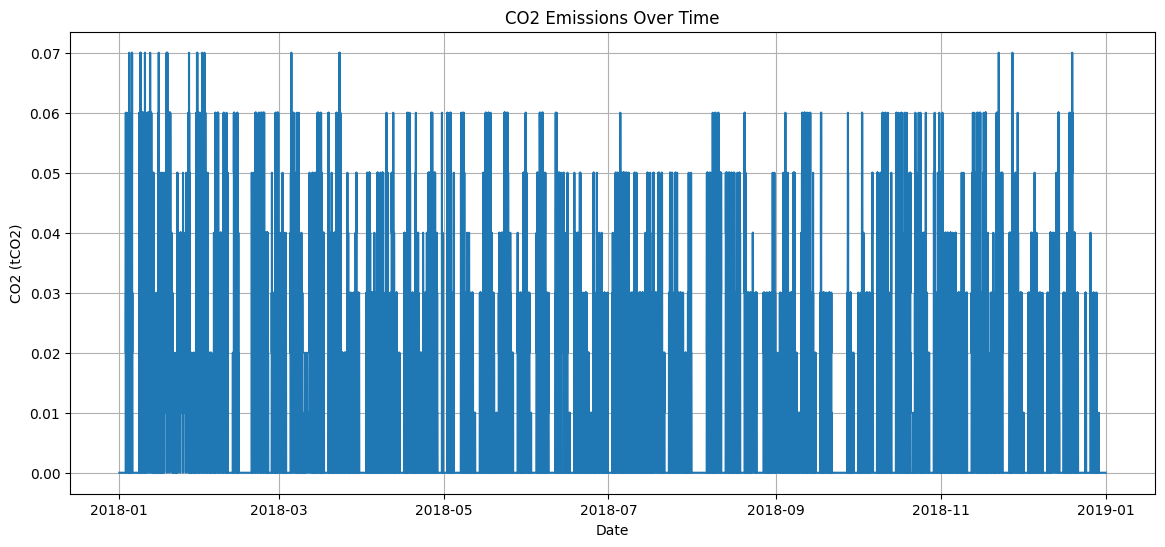

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='CO2(tCO2)')
plt.title("CO2 Emissions Over Time")
plt.xlabel("Date")
plt.ylabel("CO2 (tCO2)")
plt.grid(True)
plt.show()

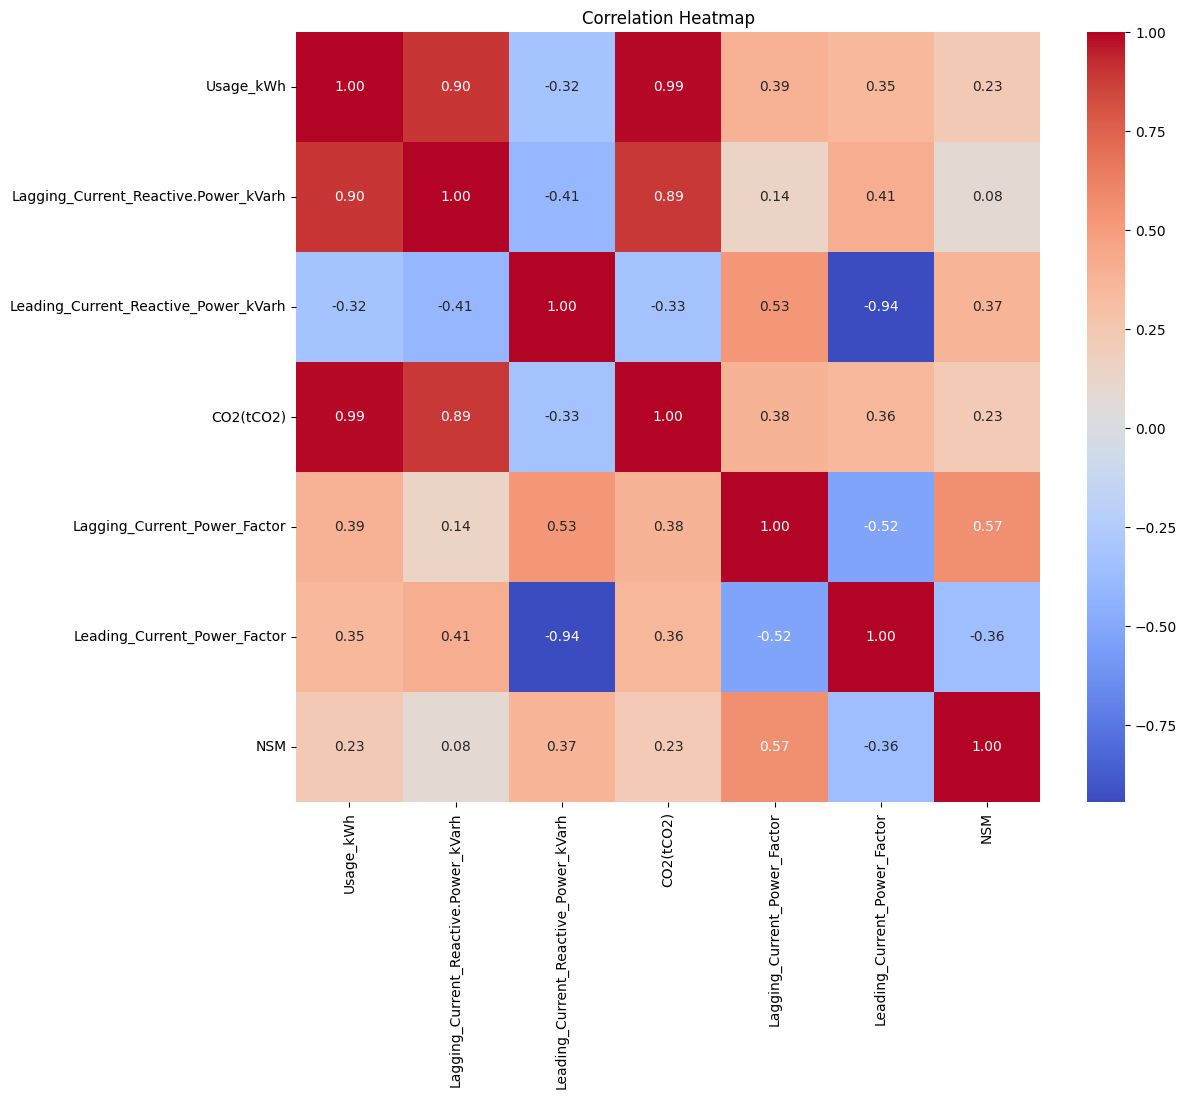

In [ ]:
# numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

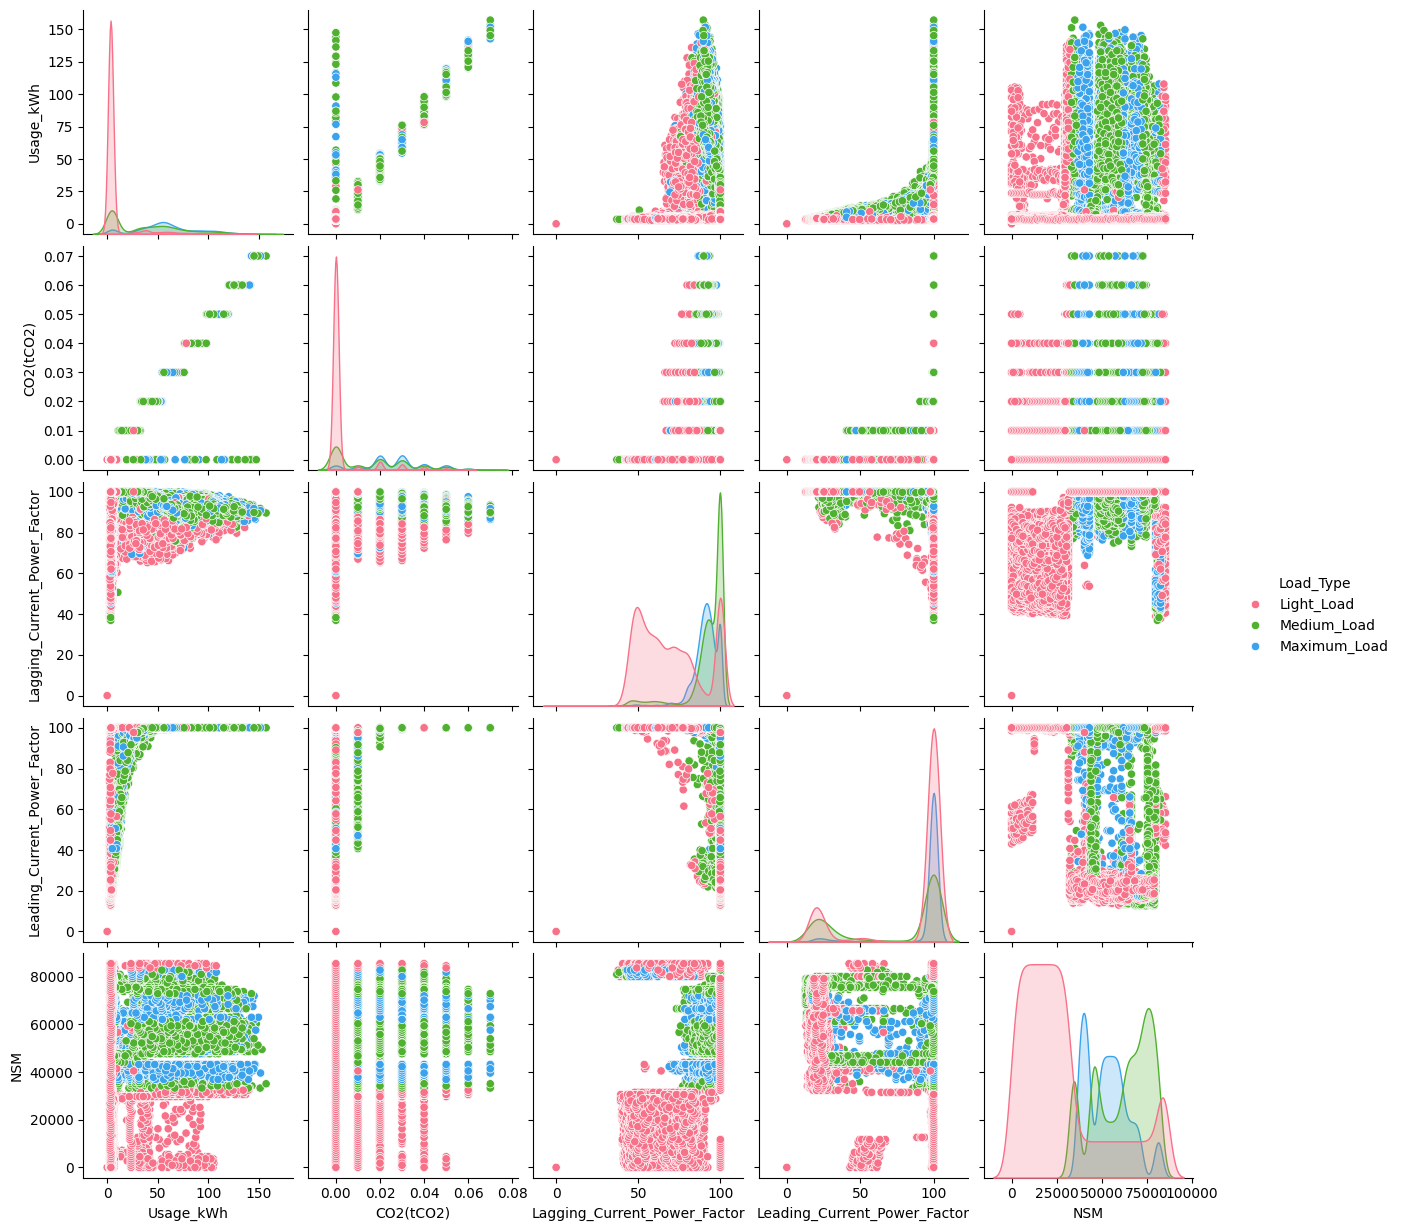

In [ ]:
sns.pairplot(df[['Usage_kWh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'Load_Type']], hue='Load_Type', palette='husl')
plt.show()

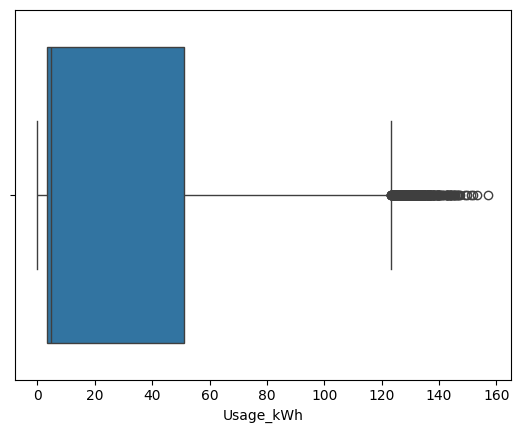

In [ ]:
# Boxplot for detecting outliers in Usage_kWh
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Usage_kWh'])
plt.show()

<ipython-input-15-92ae243ea162>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Load_Type', y='Usage_kWh', palette='Set2')


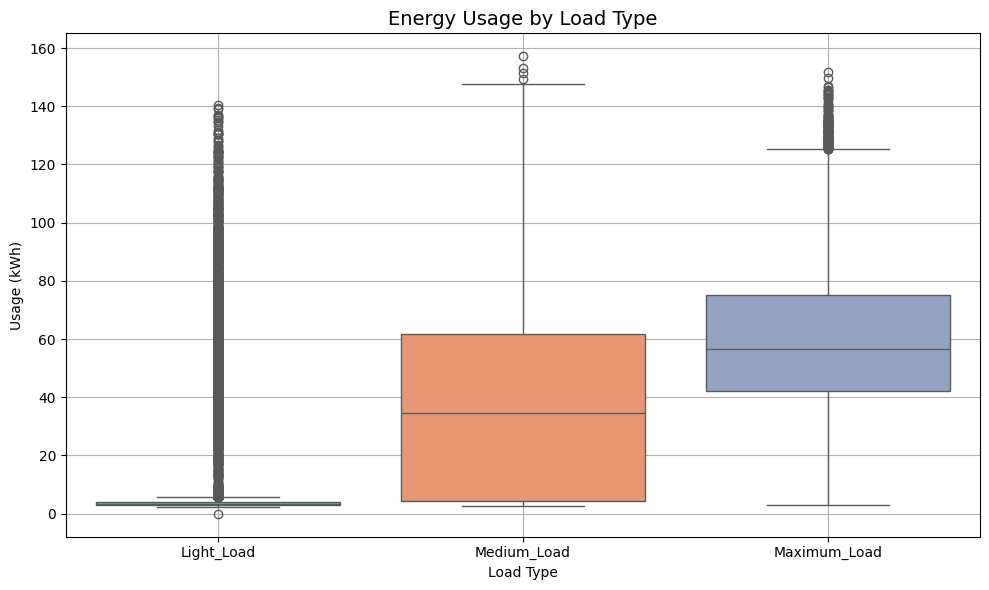

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Load_Type', y='Usage_kWh', palette='Set2')
plt.title('Energy Usage by Load Type', fontsize=14)
plt.xlabel('Load Type')
plt.ylabel('Usage (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-26-8d9d1f9b4e5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Load_Type', y='CO2(tCO2)', palette='Set3')


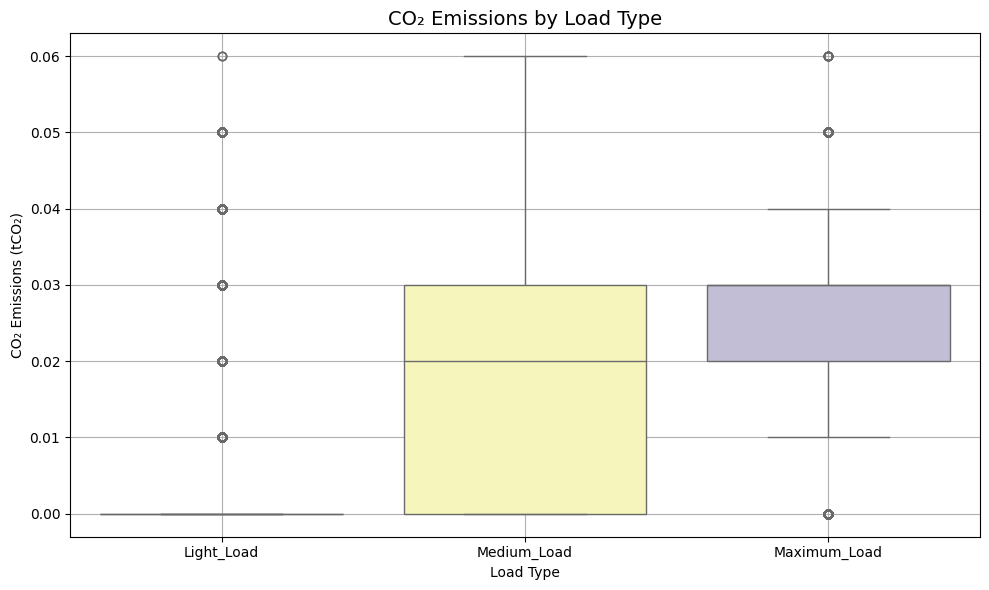

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Load_Type', y='CO2(tCO2)', palette='Set3')
plt.title('CO₂ Emissions by Load Type', fontsize=14)
plt.xlabel('Load Type')
plt.ylabel('CO₂ Emissions (tCO₂)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate IQR
Q1 = df['Usage_kWh'].quantile(0.25)
Q3 = df['Usage_kWh'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Outlier bounds for Usage_kWh:", round(lower_bound, 2), "to", round(upper_bound, 2))

# Remove outliers
df = df[(df['Usage_kWh'] >= lower_bound) & (df['Usage_kWh'] <= upper_bound)]

# Confirm they are gone
print("After removal:", df['Usage_kWh'].min(), df['Usage_kWh'].max())

Outlier bounds for Usage_kWh: -67.49 to 121.02
After removal: 0.0 120.92


In [ ]:
def remove_outliers_with_bounds(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()

    for group in df[group_col].unique():
        print(f"\n=== Load Type: {group} ===")
        subset = df[df[group_col] == group].copy()

        for col in target_cols:
            Q1_before = subset[col].quantile(0.25)
            Q3_before = subset[col].quantile(0.75)
            IQR_before = Q3_before - Q1_before
            lower_before = Q1_before - 1.5 * IQR_before
            upper_before = Q3_before + 1.5 * IQR_before
            print(f"\n→ {col} (Before Removal)")
            print(f"   Bounds: {lower_before:.2f} to {upper_before:.2f}")
            print(f"   Actual: {subset[col].min():.2f} to {subset[col].max():.2f}")

            # Remove outliers
            subset = subset[(subset[col] >= lower_before) & (subset[col] <= upper_before)]

            # After cleaning
            Q1_after = subset[col].quantile(0.25)
            Q3_after = subset[col].quantile(0.75)
            IQR_after = Q3_after - Q1_after
            lower_after = Q1_after - 1.5 * IQR_after
            upper_after = Q3_after + 1.5 * IQR_after
            print(f"→ {col} (After Removal)")
            print(f"   Bounds: {lower_after:.2f} to {upper_after:.2f}")
            print(f"   Actual: {subset[col].min():.2f} to {subset[col].max():.2f}")

        cleaned_df = pd.concat([cleaned_df, subset])

    return cleaned_df.reset_index(drop=True)

# List of columns you want to clean
target_columns = ['Usage_kWh', 'CO2(tCO2)']

# Apply the function
df_cleaned = remove_outliers_with_bounds(df, group_col='Load_Type', target_cols=target_columns)



=== Load Type: Light_Load ===

→ Usage_kWh (Before Removal)
   Bounds: 1.73 to 4.89
   Actual: 0.00 to 56.20
→ Usage_kWh (After Removal)
   Bounds: 1.84 to 4.72
   Actual: 2.45 to 4.86

→ CO2(tCO2) (Before Removal)
   Bounds: 0.00 to 0.00
   Actual: 0.00 to 0.00
→ CO2(tCO2) (After Removal)
   Bounds: 0.00 to 0.00
   Actual: 0.00 to 0.00

=== Load Type: Medium_Load ===

→ Usage_kWh (Before Removal)
   Bounds: -79.11 to 143.48
   Actual: 2.52 to 120.85
→ Usage_kWh (After Removal)
   Bounds: -79.11 to 143.48
   Actual: 2.52 to 120.85

→ CO2(tCO2) (Before Removal)
   Bounds: -0.04 to 0.07
   Actual: 0.00 to 0.06
→ CO2(tCO2) (After Removal)
   Bounds: -0.04 to 0.07
   Actual: 0.00 to 0.06

=== Load Type: Maximum_Load ===

→ Usage_kWh (Before Removal)
   Bounds: 11.25 to 101.54
   Actual: 10.91 to 98.14
→ Usage_kWh (After Removal)
   Bounds: 11.33 to 101.49
   Actual: 11.30 to 98.14

→ CO2(tCO2) (Before Removal)
   Bounds: 0.01 to 0.04
   Actual: 0.01 to 0.04
→ CO2(tCO2) (After Removal)
   

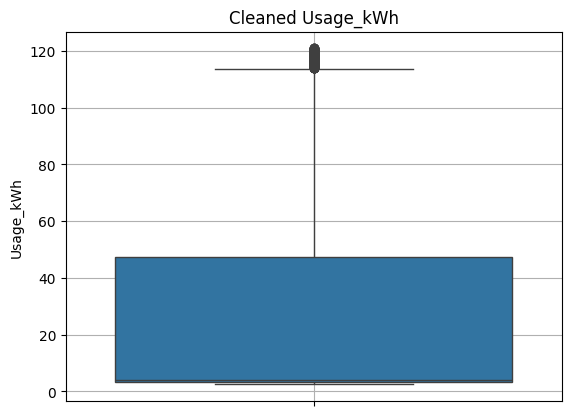

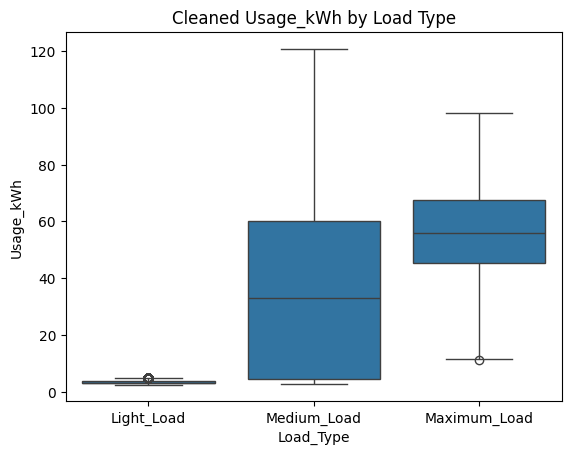

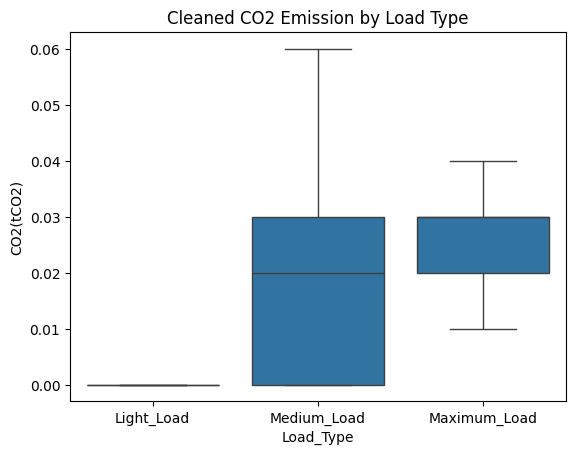

In [ ]:
# Boxplot for Usage_kWh
sns.boxplot(data=df_cleaned, y='Usage_kWh')
plt.title('Cleaned Usage_kWh')
plt.ylabel('Usage_kWh')
plt.grid(True)
plt.show()

sns.boxplot(data=df_cleaned, x='Load_Type', y='Usage_kWh')
plt.title('Cleaned Usage_kWh by Load Type')
plt.show()

# Boxplot for CO2(tCO2)
sns.boxplot(data=df_cleaned, x='Load_Type', y='CO2(tCO2)')
plt.title('Cleaned CO2 Emission by Load Type')
plt.show()

In [ ]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Year'] = df['date'].dt.dayofyear

In [ ]:
# Assume df is your cleaned/preprocessed DataFrame
categorical_cols = ['Day_of_week', 'WeekStatus', 'Load_Type']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Year', 'Month', 'Day', 'Day_of_Year', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'WeekStatus_Weekend',
       'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')


In [ ]:
# Use the encoded dataframe
X = df_encoded.drop(columns=['Usage_kWh'])  # features
y = df_encoded['Usage_kWh']  # target

In [ ]:
df_encoded['Usage_kWh_lag1'] = df_encoded['Usage_kWh'].shift(1)
df_encoded['Usage_kWh_lag2'] = df_encoded['Usage_kWh'].shift(2)
df_encoded['Usage_kWh_lag3'] = df_encoded['Usage_kWh'].shift(3)
df_encoded.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target column
target = 'Usage_kWh'

# Identify columns that are not categorical (i.e., numerical)
numerical_features = [
    'Usage_kWh_lag1', 'Usage_kWh_lag2', 'Usage_kWh_lag3',
    'CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor', 'NSM'
]

# Everything else excluding target and numericals are categorical (one-hot)
categorical_features = [col for col in df_encoded.columns if col not in numerical_features + [target]]

# Final features for scaling
all_features = numerical_features + categorical_features

In [ ]:
scaler = StandardScaler()

# Scale only numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [ ]:
X = df_encoded.drop(columns=['Usage_kWh','date'])  # all features
y = df_encoded['Usage_kWh']                 # target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, name):
    preds = model.predict(X_test)
    print(f"{name} Evaluation:")
    print("MAE: ", round(mean_absolute_error(y_test, preds), 2))
    print("MSE: ", round(mean_squared_error(y_test, preds), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)), 2))
    print("R²:  ", round(r2_score(y_test, preds), 2), "\n")
    return preds # Return the predictions

# Evaluate both
lr_preds = evaluate_model(lr_model, X_test, y_test, "Linear Regression")
rf_preds = evaluate_model(rf_model, X_test, y_test, "Random Forest")

Linear Regression Evaluation:
MAE:  2.16
MSE:  13.2
RMSE: 3.63
R²:   0.98 

Random Forest Evaluation:
MAE:  0.53
MSE:  1.77
RMSE: 1.33
R²:   1.0 



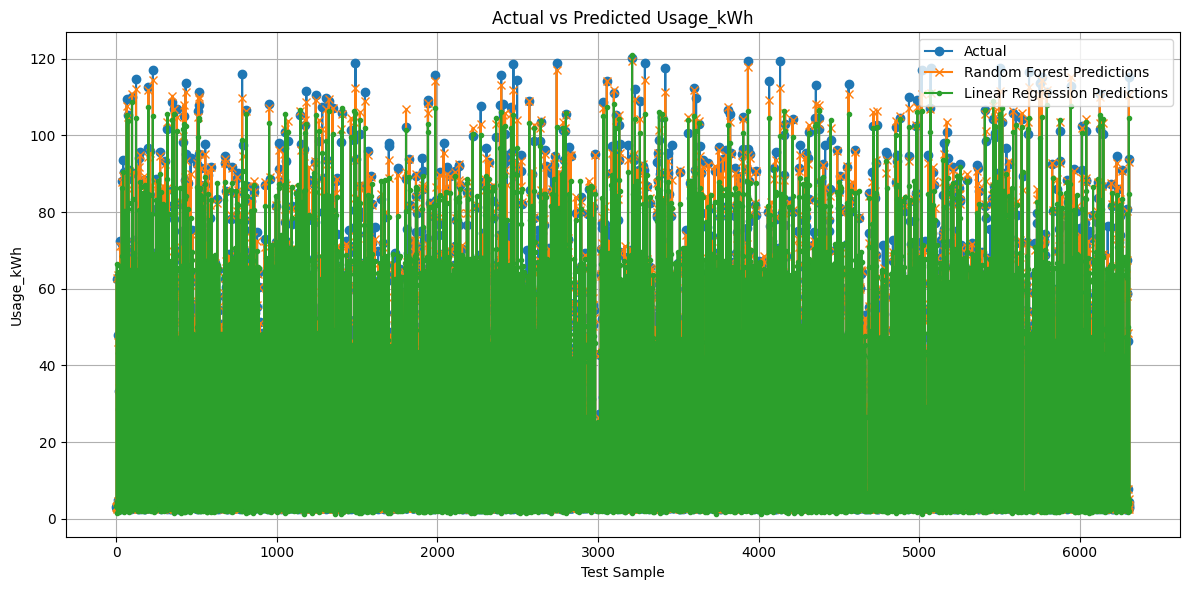

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(rf_preds, label='Random Forest Predictions', marker='x')
plt.plot(lr_preds, label='Linear Regression Predictions', marker='.')
plt.title('Actual vs Predicted Usage_kWh')
plt.xlabel('Test Sample')
plt.ylabel('Usage_kWh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Number of future days to predict
n_steps = 7

# Create a copy of the last known row to use as a starting point
last_row = df_encoded.iloc[-1:].copy()

# Store predictions
future_predictions = []

for i in range(n_steps):
    # Predict using current features, EXCLUDING 'date' and 'Usage_kWh'
    prediction = rf_model.predict(last_row.drop(columns=['Usage_kWh', 'date']))[0]
    future_predictions.append(prediction)

    # Shift lag features: lag3 <- lag2, lag2 <- lag1, lag1 <- new prediction
    last_row['Usage_kWh_lag3'] = last_row['Usage_kWh_lag2']
    last_row['Usage_kWh_lag2'] = last_row['Usage_kWh_lag1']
    last_row['Usage_kWh_lag1'] = prediction

    # Add prediction as target (not used, but for completeness)
    last_row['Usage_kWh'] = prediction

# Convert to DataFrame
future_df = pd.DataFrame({
    'Day': pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_steps),
    'Predicted_Usage_kWh': future_predictions
})

print(future_df)

                  Day  Predicted_Usage_kWh
0 2018-12-29 12:00:00              47.0492
1 2018-12-30 12:00:00              47.0015
2 2018-12-31 12:00:00              47.1033
3 2019-01-01 12:00:00              46.9834
4 2019-01-02 12:00:00              46.9834
5 2019-01-03 12:00:00              46.9834
6 2019-01-04 12:00:00              46.9834


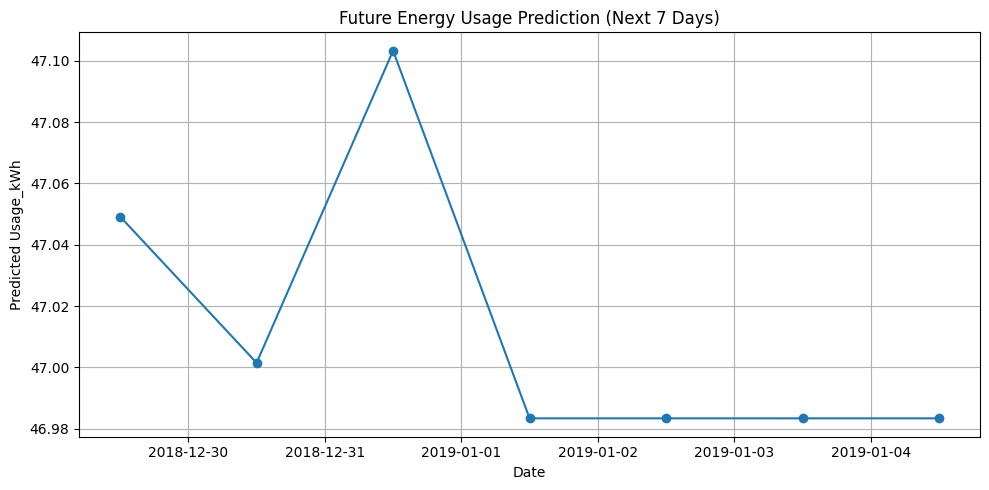

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(future_df['Day'], future_df['Predicted_Usage_kWh'], marker='o', linestyle='-')
plt.title('Future Energy Usage Prediction (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Predicted Usage_kWh')
plt.grid(True)
plt.tight_layout()
plt.show()